In [1]:
import pandas as pd
import json

In [6]:
json_file_path = '../dataset/2021-03-19_classification-labeling-results.json'
with open(json_file_path) as json_file:
    data = json.load(json_file)
    for task in data:
        print('image:', task['image'])
        print('possible_answers: ',task['possible_answers'])
        for label_result in task['selected_labels']:
            print('result_id: ',label_result['result_id'], ' -- selected label: ', label_result['coa_description'])
            print('result_id: ',label_result['result_id'], ' -- selected label: ', label_result['coa_description'])
    
        print('-----')


image: annotated-images/Donaueschinger Wappenbuch - Cod Donaueschingen 496_4.jpg
possible_answers:  B O cross potenty fitchy<|> eagle :dim: semy of fleurs-de-lis  {OS, BO}<|>B O 3 crowns<|>A S dragon<|>O GAA lion enthroned holding sword
result_id:  1  -- selected label:  B O cross potenty fitchy
result_id:  3  -- selected label:  B O 3 crowns
result_id:  5  -- selected label:  O GAA lion enthroned holding sword
result_id:  4  -- selected label:  A S dragon
-----
image: annotated-images/Donaueschinger Wappenbuch - Cod Donaueschingen 496_8.jpg
possible_answers:  O G rose<|>G A 3 hares salient<|> lion; 2 bars embattled-counterembattled; = ; =  {AG, GA}<|>A G 2 bars radiant
result_id:  3  -- selected label:   lion; 2 bars embattled-counterembattled; = ; =  {AG, GA}
result_id:  1  -- selected label:  O G rose
result_id:  2  -- selected label:  G A 3 hares salient
result_id:  4  -- selected label:  A G 2 bars radiant
-----
image: annotated-images/Donaueschinger Wappenbuch - Cod Donaueschinge

possible_answers:  G AS bend ch. bird<|>G AB chief ch. lion isst<|>S A 3 fleurs-de-lis<|>S X AG bend checky<|>A S per pale & 2 antlers per pale cch
result_id:  4  -- selected label:  S X AG bend checky
result_id:  5  -- selected label:  A S per pale & 2 antlers per pale cch
result_id:  2  -- selected label:  G AB chief ch. lion isst
-----
image: annotated-images/Donaueschinger Wappenbuch - Cod Donaueschingen 496_230.jpg
possible_answers:  X G OA per pale & lion passt guard<|>B O talon terminated in chf by 2 fleurs-de-lis<|>B OG roundel ch. lion passt<|>A SO 3 nails & border<|>B A pale
result_id:  4  -- selected label:  A SO 3 nails & border
result_id:  1  -- selected label:  X G OA per pale & lion passt guard
-----
image: annotated-images/Donaueschinger Wappenbuch - Cod Donaueschingen 496_231.jpg
possible_answers:  A G bendy of 4<|>S A turnip<|>S AO ibex segreant & border
result_id:  3  -- selected label:  S AO ibex segreant & border
result_id:  1  -- selected label:  A G bendy of 4
--

KeyError: 'result_id'

In [7]:

df = pd.read_json(json_file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   task_id           720 non-null    int64 
 1   image             720 non-null    object
 2   annotations       720 non-null    object
 3   possible_answers  720 non-null    object
 4   selected_labels   720 non-null    object
dtypes: int64(1), object(4)
memory usage: 28.2+ KB


In [8]:
# https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8
# Flatten data
df_nested_list = pd.json_normalize(data)
df_nested_list

,task_id,image,annotations,possible_answers,selected_labels
0,1693,annotated-images/Donaueschinger Wappenbuch - C...,annotated-images/Donaueschinger Wappenbuch - C...,B O cross potenty fitchy<|> eagle :dim: semy o...,"[{'result_id': '1', 'coa_description': 'B O cr..."
1,1694,annotated-images/Donaueschinger Wappenbuch - C...,annotated-images/Donaueschinger Wappenbuch - C...,O G rose<|>G A 3 hares salient<|> lion; 2 bars...,"[{'result_id': '3', 'coa_description': ' lion;..."
2,1695,annotated-images/Donaueschinger Wappenbuch - C...,annotated-images/Donaueschinger Wappenbuch - C...,B AOG elephant bearing tower above crown in ba...,"[{'result_id': '1', 'coa_description': 'B AOG ..."
3,1696,annotated-images/Donaueschinger Wappenbuch - C...,annotated-images/Donaueschinger Wappenbuch - C...,B O 3 fleurs-de-lis,"[{'result_id': '1', 'coa_description': 'B O 3 ..."
4,1697,annotated-images/Donaueschinger Wappenbuch - C...,annotated-images/Donaueschinger Wappenbuch - C...,"castle; lion; =; = {GO, AP}<|>O G 4 pales<|>...","[{'result_id': '1', 'coa_description': ' castl..."
...,...,...,...,...,...
715,4226,annotated-images/BnF. Departement des manuscri...,annotated-images/BnF. Departement des manuscri...,O GG fess betw 2 chevrons<|>S A lion rampant<|...,"[{'result_id': '1', 'coa_description': 'O GG f..."
716,4227,annotated-images/BnF. Departement des manuscri...,annotated-images/BnF. Departement des manuscri...,G O 10 mascles<|>S GO bend betw 6 lions<|>G AA...,"[{'result_id': '5', 'coa_description': 'O B 3 ..."
717,4228,annotated-images/BnF. Departement des manuscri...,annotated-images/BnF. Departement des manuscri...,B OO chevron betw 3 cups covered<|>E G canton<...,"[{'result_id': '1', 'coa_description': 'B OO c..."
718,4229,annotated-images/BnF. Departement des manuscri...,annotated-images/BnF. Departement des manuscri...,"barry nebuly; lion, flory; =; = {OG, BAA}<|...","[{'result_id': '1', 'coa_description': ' barry..."


In [100]:
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def plot_bar_chart(data):
    labels, values = zip(*data)
    indexes = np.arange(len(labels))
    width = 0.5

    plt.rcParams["figure.figsize"] = (20, 10)
    plt.bar(indexes, values, width)
    plt.xticks(indexes, labels, rotation='vertical', fontsize=15)
    plt.show()

possible_answers = df.filter(['possible_answers']).values.reshape(1, -1).ravel().tolist()
all_answers = []
labels = []
refined_answers = []
for possible_answer in possible_answers:
    chunks = possible_answer.split('<|>')
    for c in chunks:
        all_answers.append(c)
        refined_answers.append(re.sub(r"\b[a-zA-Z]\b", "", c).lstrip().rstrip())
        ws = re.findall(r'\w+', c)
        for w in ws:
            labels.append(w)

print('all answers: ',len(all_answers))
print('all refined answers: ',len(refined_answers))
print('all single labels: ',len(labels))


all answers:  3001
all refined answers:  3001
all single labels:  15520


In [101]:

selected_labels = df.filter(['selected_labels']).values.reshape(1, -1).ravel()
all_labels = []
vocabularies = []
for selected_label in selected_labels:
    for k in selected_label:
        try:
            caption = k["coa_description"]
            all_labels.append(caption)
            ws = re.findall(r'\w+', caption)
            for w in ws:
                vocabularies.append(w)

        except:
            continue

print('all labels: ',len(all_labels))
print('all vocabularies: ',len(vocabularies))


all labels:  1982
all vocabularies:  10437


In [102]:

len(set(all_labels))

1155

In [103]:
len(set(vocabularies))

622

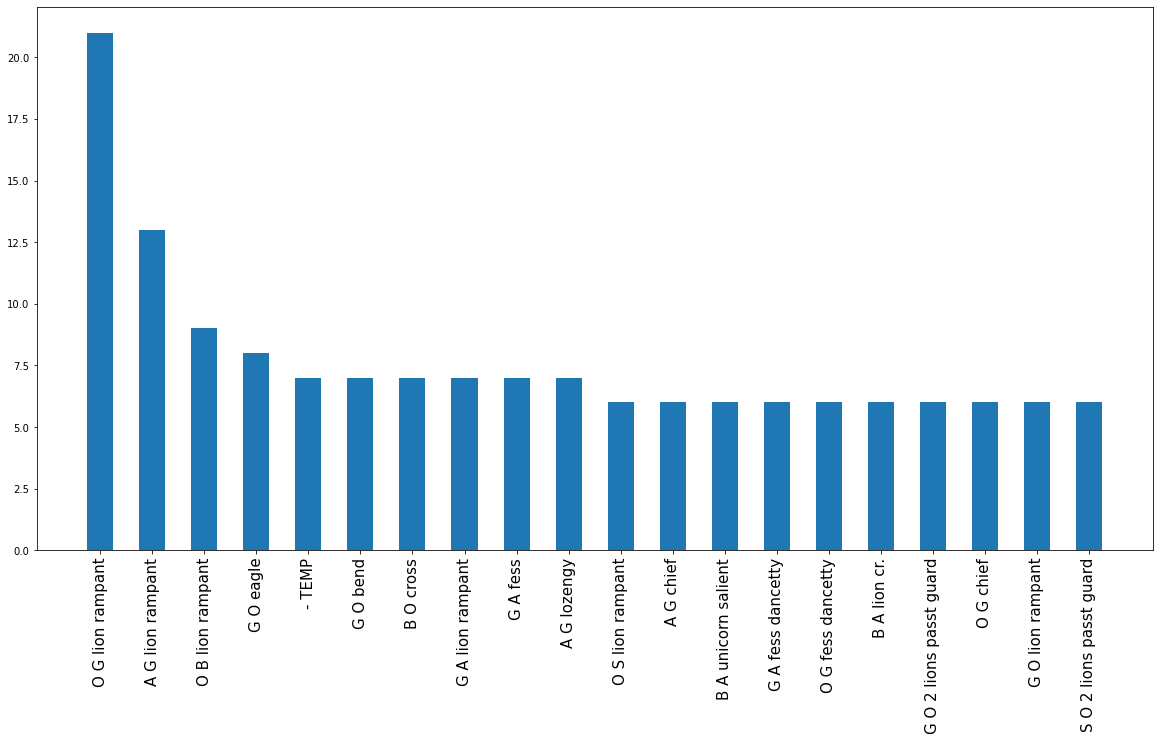

[('O G lion rampant', 21),
 ('A G lion rampant', 13),
 ('O B lion rampant', 9),
 ('G O eagle', 8),
 ('- TEMP', 7),
 ('G O bend', 7),
 ('B O cross', 7),
 ('G A lion rampant', 7),
 ('G A fess', 7),
 ('A G lozengy', 7),
 ('O S lion rampant', 6),
 ('A G chief', 6),
 ('B A unicorn salient', 6),
 ('G A fess dancetty', 6),
 ('O G fess dancetty', 6),
 ('B A lion cr.', 6),
 ('G O 2 lions passt guard', 6),
 ('O G chief', 6),
 ('G O lion rampant', 6),
 ('S O 2 lions passt guard', 6)]

In [105]:
x = Counter(all_labels)
plot_bar_chart(x.most_common(20))
x.most_common(20)

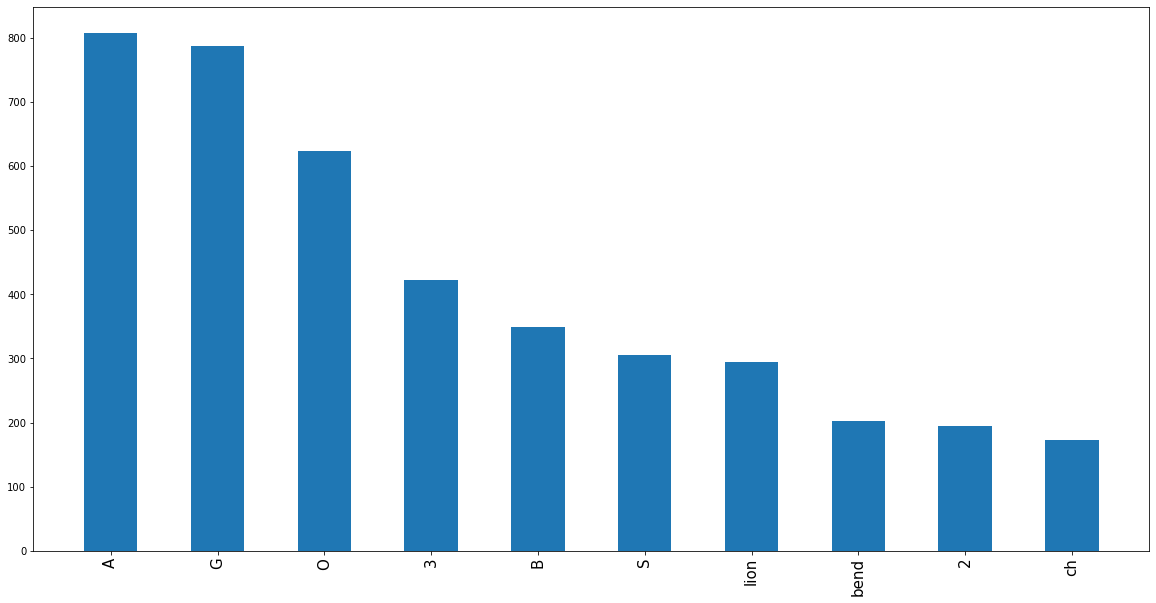

[('A', 808),
 ('G', 788),
 ('O', 623),
 ('3', 422),
 ('B', 349),
 ('S', 306),
 ('lion', 295),
 ('bend', 203),
 ('2', 194),
 ('ch', 173),
 ('fess', 153),
 ('per', 144),
 ('chief', 136),
 ('cross', 129),
 ('of', 129),
 ('in', 126),
 ('border', 111),
 ('pale', 108),
 ('acc', 106),
 ('AG', 102),
 ('de', 95),
 ('lis', 95),
 ('rampant', 87),
 ('eagle', 87),
 ('fleurs', 86),
 ('GA', 73),
 ('barry', 71),
 ('X', 71),
 ('chevron', 70),
 ('GO', 69),
 ('passt', 68),
 ('lions', 66),
 ('OG', 65),
 ('cr', 62),
 ('s', 61),
 ('saltire', 59),
 ('semy', 56),
 ('E', 53),
 ('bendy', 53),
 ('AO', 51),
 ('checky', 50),
 ('bars', 49),
 ('betw', 48),
 ('guard', 46),
 ('4', 46),
 ('AB', 43),
 ('addorsed', 39),
 ('6', 38),
 ('OO', 37),
 ('OB', 36)]

In [106]:
#  rule based generation 
# colors -> different objects > a modified object (regarding to poses) ( location to each other is injected in between )

y = Counter(vocabularies)
plot_bar_chart(y.most_common(10))
y.most_common(50)

## colours histogram 

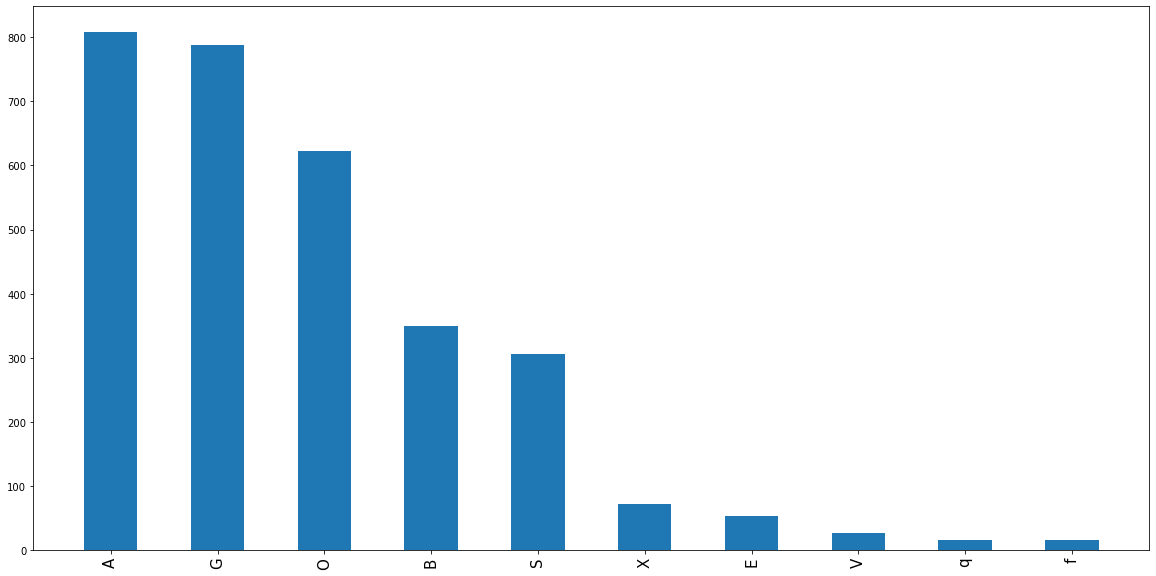

[('A', 808),
 ('G', 788),
 ('O', 623),
 ('B', 349),
 ('S', 306),
 ('X', 71),
 ('E', 53),
 ('V', 26)]

In [107]:
cleaned_vocabularies_with_color_only = [l for l in vocabularies if len(l)<2 and not l.isnumeric() and not l == "s"]
z = Counter(cleaned_vocabularies_with_color_only)
plot_bar_chart(z.most_common(10))
z.most_common(8)

## general histogram 

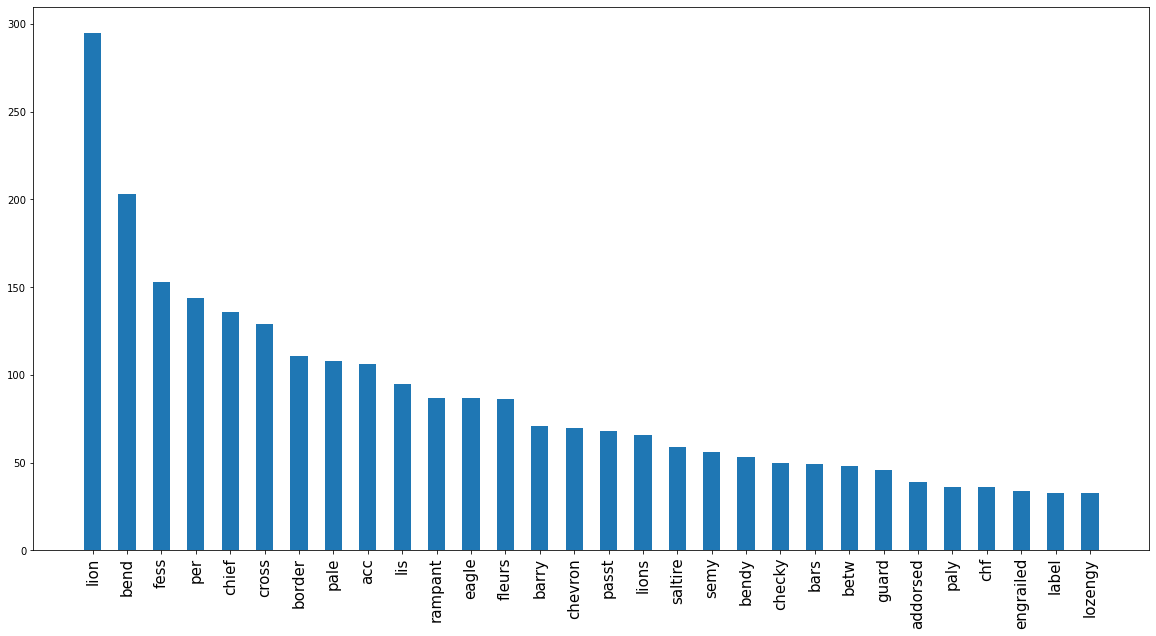

[('lion', 295),
 ('bend', 203),
 ('fess', 153),
 ('per', 144),
 ('chief', 136),
 ('cross', 129),
 ('border', 111),
 ('pale', 108),
 ('acc', 106),
 ('lis', 95),
 ('rampant', 87),
 ('eagle', 87),
 ('fleurs', 86),
 ('barry', 71),
 ('chevron', 70),
 ('passt', 68),
 ('lions', 66),
 ('saltire', 59),
 ('semy', 56),
 ('bendy', 53),
 ('checky', 50),
 ('bars', 49),
 ('betw', 48),
 ('guard', 46),
 ('addorsed', 39),
 ('paly', 36),
 ('chf', 36),
 ('engrailed', 34),
 ('label', 33),
 ('lozengy', 33)]

In [108]:
cleaned_vocabularies_without_color = [l for l in vocabularies if len(l)>2]

z = Counter(cleaned_vocabularies_without_color)
plot_bar_chart(z.most_common(30))
z.most_common(30)

## charges histogram 

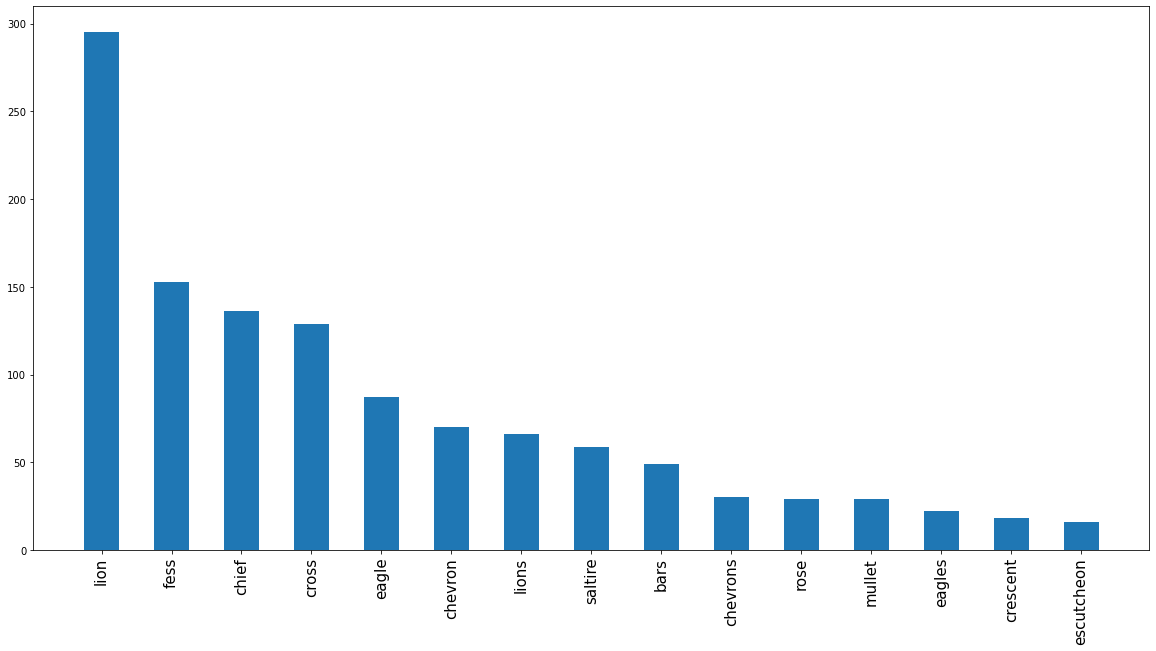

[('lion', 295),
 ('fess', 153),
 ('chief', 136),
 ('cross', 129),
 ('eagle', 87),
 ('chevron', 70),
 ('lions', 66),
 ('saltire', 59),
 ('bars', 49),
 ('chevrons', 30),
 ('rose', 29),
 ('mullet', 29),
 ('eagles', 22),
 ('crescent', 18),
 ('escutcheon', 16)]

In [109]:
OBJECTS = ['lion', 'lions','fess', 'cross','crosses', 'crescent', 'chief', 'chevron', 'chevrons','escutch', 'escutcheon', 'mullet',
               'eagle',  'eagles', 'bars', 'fleur-de-lis', 'martlet', 'saltire', 'estoile', 'rose','roses',
               'leave', 'fish', 'leopard', 'bear', 'ram', 'lamb', 'boar', 'cow', 'duck',
               'dragon', 'merlette', 'cock', 'volcano', 'falcon', 'wing', 'oak',
               'fleurs-de-lis', 'branch', 'bull', 'elephant', 'griffin', 'horseshoe', 'hare',
               'panther', 'hand', 'bugle-horn', 'lure', 'tail',
               'dice', 'donkey', 'face', 'unicorn', 'blackbird', 'marmite', 'attire']

cleaned_vocabularies_only_charges = [l for l in vocabularies if len(l)>2 and l in OBJECTS]

z = Counter(cleaned_vocabularies_only_charges)
plot_bar_chart(z.most_common(15))
z.most_common(15)

## modifiers histogram 

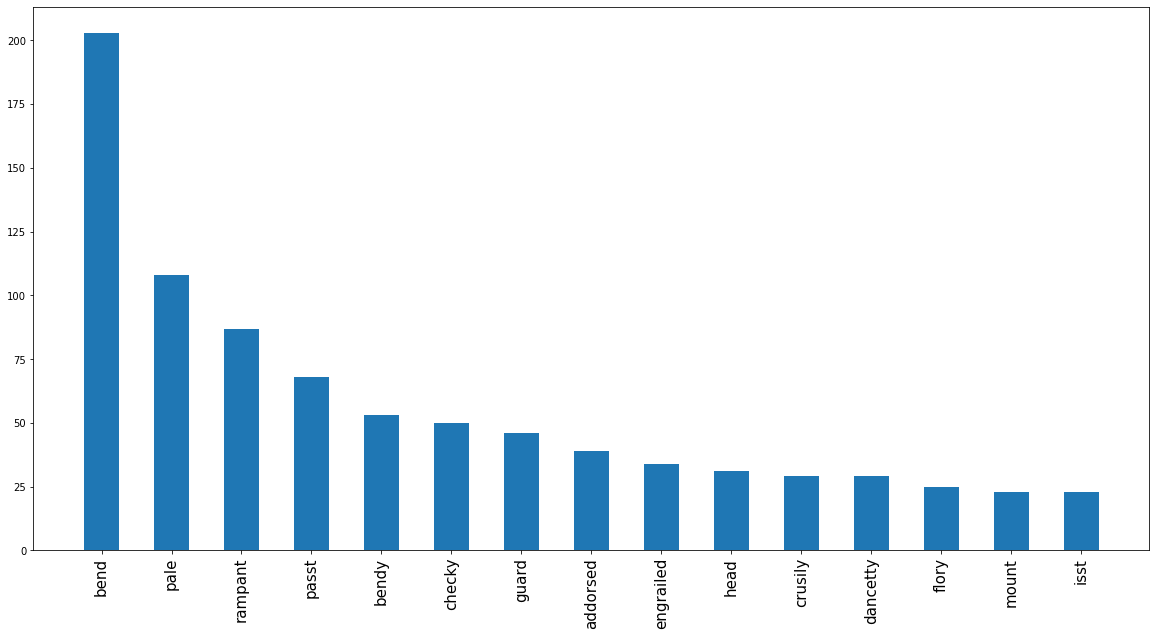

[('bend', 203),
 ('pale', 108),
 ('rampant', 87),
 ('passt', 68),
 ('bendy', 53),
 ('checky', 50),
 ('guard', 46),
 ('addorsed', 39),
 ('engrailed', 34),
 ('head', 31),
 ('crusily', 29),
 ('dancetty', 29),
 ('flory', 25),
 ('mount', 23),
 ('isst', 23)]

In [110]:
MODIFIERS = ['rampant', 'dancetty', 'salient', 'roundel', 'bend', 'annulet', 'lozenge',
                 'orle', 'crusily', 'pale', 'doubleheaded', 'rising', 'addorsed', 'slipped',
                 'erect', 'cr.', 'chained', 'erased', 'hooded', 'winged', 'embattled',
                 'gorged', 'arched', 'segreant', 'pd', 'isst', 'jesst', 'passt', 'guard','passt guard', 'sejt', 'reguard',
                 'inv', 'cch', 'segr', 'p.c.', 'p.n.', 'col', 'displayed','sn', 'dx', 'dancetty', 'mount',
                 'flory', 'undy', 'masoned', 'bendy', 'potenty', 'checky', 
                 'compony', 'roundely', 'engrailed', 'crenelated', 'nebuly', 'castely', 'moline','patonce', 'head', 'heads']

cleaned_vocabularies_only_mod = [l for l in vocabularies if len(l)>2 and l in MODIFIERS ]

z = Counter(cleaned_vocabularies_only_mod)
plot_bar_chart(z.most_common(15))
z.most_common(15)

In [14]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('dataset/annotated-images/Donaueschinger Wappenbuch - Cod. Donaueschingen 496_119v.jpg')
imgplot = plt.imshow(img)
plt.show()


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: [Errno 2] No such file or directory: 'dataset/annotated-images/Donaueschinger Wappenbuch - Cod. Donaueschingen 496_119v.jpg'

In [ ]:
# to try: https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/